In [1]:
# Import librarys
import pandas as pd

In [2]:
# read CSV file directly from a URL
# use .read_csv method and pass the name of the file
# D:/Computer_Science/Ciclo_II/Machine_Learning/Data_Excel/Advertising.csv -> local
# 'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv' -> url
data = pd.read_csv('D:/Computer_Science/Ciclo_II/Machine_Learning/Data_Excel/Advertising.csv', index_col=0)

# data: display all rows
#data.head(): display the first 5 rows
data['TV'].head()   # display the first 5 data in 'TV' column

1    230.1
2     44.5
3     17.2
4    151.5
5    180.8
Name: TV, dtype: float64

In [3]:
# data['TV'].tail() -> display the last 5 TV data
data.tail()     # display the last 5 rows

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
# check the shape of the DataFrame (rows, columns)
# there are 200 rows x 4 columns
data.shape

(200, 4)

# Visualizing data

In [5]:
# conventional way to import seaborn 
# In command install:   pip install seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

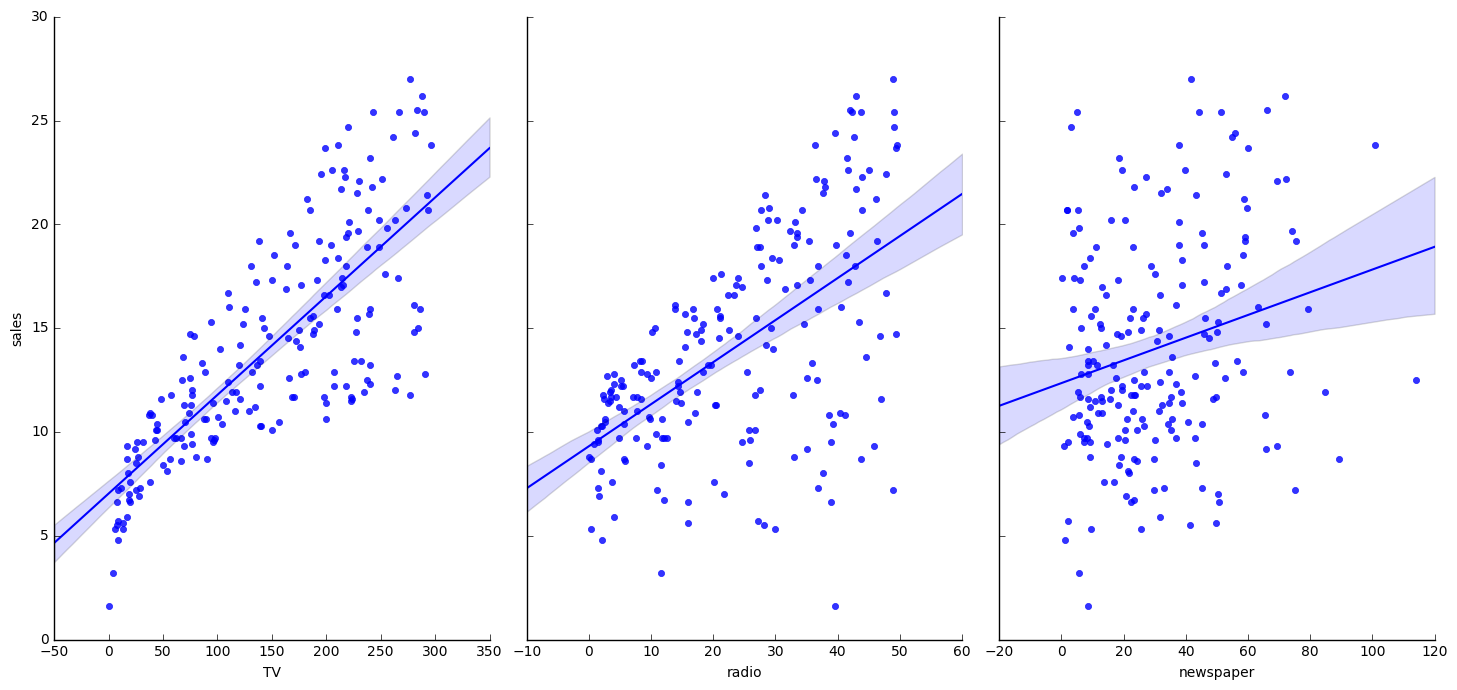

In [6]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [7]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = pd.DataFrame(data, columns=feature_cols) 

# print the first 5 rows
X.head()   # X is a DataFrame

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [9]:
# select a sales from the DataFrame, y = vector of sales
y = data['sales']

# print the first 5 values
y.head()

# y.shape -> (200),  type(y) -> Series)

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

# Splitting X and y into training and testing sets

In [10]:
# import, a subset is training (train) and the other subset is testing (test)
# In command install:  pip install -U scikit-learn (deprecated)
# In command install: python -m pip install --upgrade pip

from sklearn.model_selection import train_test_split
# train_test_split(): Function that divide the total of data in two groups (train and test)
# random_state: select randomly rows
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [17]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


# Linear Regression

In [55]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

## Excercise 1  - Try your own linear regression algorithm 
# This program calculate 'Theta' vector parameters which optimize a Regresion Lineal
# Data: X_train -> matrix (150x3), y_train -> vector (150)

# Theta_1 -> tv, Theta_2 -> radio, Theta_3 -> newspaper, Theta_0 -> intercept
# Theta_t -> transpose of vector Theta
# m: size of proof, a is a parameter (learning rate)
# Model of Regresion Lineal: h_theta(X) = Theta_t * X   (hypothesis)

# Cost function: J(Theta) = (1/2m) Sumatory (h_theta(x_i) - y_i)^2    i = {1,..,m}

# Gradient Descent Algorithm:  Theta_j = Theta_j - a d(J(Theta))/d(Theta_j)   j = {0,1,2,3}
import numpy as np

# Initials variables 
m = 150                                             # size of data training
a = 0.000001                                        # learning rate
b = a / m
e = 0.000001                                        # ERROR
Theta = np.array([0,0,0,0])                         # initial values of vector Theta
size_Theta = len(Theta)
answer = np.array([2.87696662232, 0.04656457, 0.17915812, 0.00345046])

# Util variables
X = np.array(X_train)                                # X is an array
X = np.insert(X, 0, values = 1, axis = 1)            # add a first column of ones 
y = np.array(y_train)                                # y is an array

# Aplying FEATURE SCALING (accelerates convergence)
X[:,1] = X[:,1] / np.max(X[:,1])                     # maximum of TVs -> 296.4
X[:,2] = X[:,2] / np.max(X[:,2])                     # maximum of radios -> 49.4
X[:,3] = X[:,3] / np.max(X[:,3])                     # maximum of newspaper -> 100.9

for i in range(0, size_Theta):
    val = Theta[i]
    while (val - answer[i] < e):
        v = np.subtract(X.dot(Theta), y)             # h_theta(x_i) - y_i
        v_i = v.dot(X[:,i])
        val = Theta[i] - b * v_i
        #Theta[i] = val;
        if (i == 0):
            Theta = np.array([val, 0, 0, 0])                # initial values of vector Theta
        if (i == 1):
            Theta = np.array([0, val, 0, 0])                # initial values of vector Theta 
        if (i == 2):
            Theta = np.array([val, 0, val, 0])              # initial values of vector Theta
        if (i == 3):
            Theta = np.array([0, 0, 0, val])                # initial values of vector Theta
    print(round(Theta[i],9))

print("\nNOW sqrt(newspaper)")
# NOW, SQRT(NEWSPAPER) because it has very weak relation)
# Aplying FEATURE SCALING (accelerates convergence)
X[:,1] = X[:,1] / np.max(X[:,1])                     # maximum of TVs -> 296.4
X[:,2] = X[:,2] / np.max(X[:,2])                     # maximum of radios -> 49.4
X[:,3] = np.sqrt(X[:,3])
X[:,3] = X[:,3] / np.max(X[:,3])                     # maximum of newspaper -> 100.9

for i in range(0, size_Theta):
    val = Theta[i]
    while (val - answer[i] < e):
        v = np.subtract(X.dot(Theta), y)             # h_theta(x_i) - y_i
        v_i = v.dot(X[:,i])
        val = Theta[i] - b * v_i
        #Theta[i] = val;
        if (i == 0):
            Theta = np.array([val, 0, 0, 0])                # initial values of vector Theta
        if (i == 1):
            Theta = np.array([0, val, 0, 0])                # initial values of vector Theta 
        if (i == 2):
            Theta = np.array([val, 0, val, 0])              # initial values of vector Theta
        if (i == 3):
            Theta = np.array([0, 0, 0, val])                # initial values of vector Theta
    print(round(Theta[i],9))

2.876973654
0.046565888
0.179160502
0.003454423

NOW sqrt(newspaper)
2.876973653
0.046565888
0.179160502
0.003454956


# Interpreting model coefficients

In [45]:
# print the intercept and coefficients
print(linreg.intercept_)                  #theta 0
print(linreg.coef_)                       #theta1(TV)  theta2(Radio)  theta3(newspaper)


2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [46]:
# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

y=2.88+0.0466×TV+0.179×radio+0.00345×Newspaper 

How do we interpret the TV coefficient (0.0466)? For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales. Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items

# Making Predictions

In [51]:
# make predictions on the testing set (library result)
y_pred = linreg.predict(X_test)
#print(y_pred)

#make predictions with my parameters of Theta vector (my result)
# instantiate
linreg2 = LinearRegression()
linreg2.intercept_ = np.float64(2.877072617)
linreg2.coef_ = np.array([0.046624628, 0.179197134, 0.003453685])
my_y_pred = linreg2.predict(X_test)


# instantiate
linreg3 = LinearRegression()
linreg3.intercept_ = np.float64(2.876973654)
linreg3.coef_ = np.array([0.046565888, 0.179160502, 0.003454956])
my_y_pred3 = linreg3.predict(X_test)

We need an evaluation metric in order to compare our predictions with the actual values.

# 4. Model evaluation metrics for regression

In [52]:
# calculate MAE using scikit-learn
from sklearn import metrics

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
    $$\frac{1}{m}\sum_{i=1}^{m}|y^{(i)}-y'^{(i)}|$$

**Mean Squared Error (MSE)** is the mean of the squared errors:
    $$\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-y'^{(i)})^2$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
     $$\sqrt{\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-y'^{(i)})^2}$$

Comparing these metrics:
- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. Easier to put in context as it's the same units as our response variable

## Computing the RMSE for our Sales predictions

In [53]:
# RMSE: it should be as small as possible  (library predictions)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# RMSE: it should be as small as possible  (my prediction)
print(np.sqrt(metrics.mean_squared_error(y_test, my_y_pred)))

# RMSE: it should be as small as possible  (my prediction with srqt(newspaper))
print(np.sqrt(metrics.mean_squared_error(y_test, my_y_pred3)))

1.40465142303
1.40480398964
1.40464904515


we can see that when I use the formula:
$$y=\theta_0+\theta_1\times TV+\theta_2\times Radio+\theta_3 \times Newspaper $$

the library prediction is a little better than my prediction, but when I use the formula:
$$y=\theta_0+\theta_1\times TV+\theta_2\times Radio+\theta_3 \times \sqrt{Newspaper} $$

my new prediction is a little better so far.